# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data/reviews.csv')

# View shape and top records
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (18442, 9)


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [13]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [14]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

## Data Exploration

## Step 1: Exploratory Data Analysis (EDA)

In this section, we perform initial exploration to understand the structure and quality of the dataset. This includes checking for missing values, understanding feature distributions, and evaluating the balance of the target variable (`Recommended IND`).


In [15]:
# Check for missing values in the dataset
df.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Recommended IND            0
dtype: int64

### Step 1.1: Summary Statistics and Data Types

We examine numerical summary statistics and data types to help decide how to treat each feature (e.g., normalize, encode, or vectorize).


In [16]:
# Get summary statistics for numerical features
df.describe()


,Clothing ID,Age,Positive Feedback Count,Recommended IND
count,18442.000000,18442.000000,18442.000000,18442.000000
mean,954.896757,43.383635,2.697484,0.816235
std,141.571783,12.246264,5.942220,0.387303
min,2.000000,18.000000,0.000000,0.000000
25%,863.000000,34.000000,0.000000,1.000000
50%,952.000000,41.000000,1.000000,1.000000
75%,1078.000000,52.000000,3.000000,1.000000
max,1205.000000,99.000000,122.000000,1.000000


In [17]:
# View column types and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


### Step 1.2: Target Variable Distribution

We analyze the target variable (`Recommended IND`) to understand the proportion of recommended vs. not recommended products.


In [18]:
# Check distribution of the target variable
df['Recommended IND'].value_counts(normalize=True)


Recommended IND
1    0.816235
0    0.183765
Name: proportion, dtype: float64

### EDA Summary

- ✅ **No missing values** detected in any column.
- 📈 `Recommended IND` is slightly imbalanced, with ~81% of reviews being positive.
- 🧓 Age ranges from 18 to 99 with a mean of ~43.
- 💬 Reviews appear to be well-distributed across departments and classes — worth plotting next.


### Step 1.3: Visualize Target Variable

To understand whether we are working with a balanced classification problem, we plot the distribution of the `Recommended IND` column. A highly imbalanced target may influence model performance and evaluation metrics.


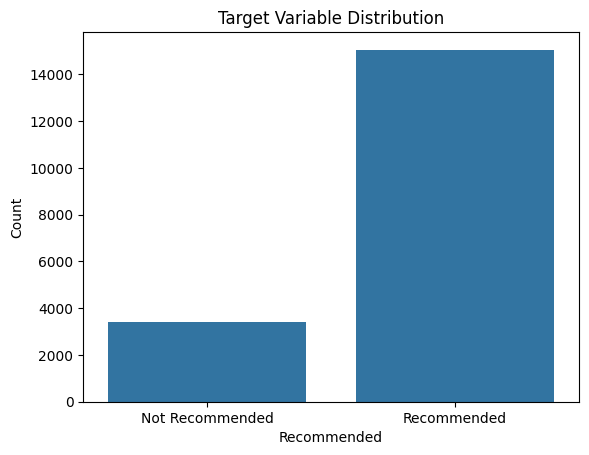

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot target variable distribution
sns.countplot(x='Recommended IND', data=df)
plt.title('Target Variable Distribution')
plt.xlabel('Recommended')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Recommended', 'Recommended'])
plt.show()


### Step 1.4: Visualize Age Distribution

We plot the distribution of customer ages to understand the demographics of the reviewers. This helps us decide whether transformations or bucketing might be useful later.


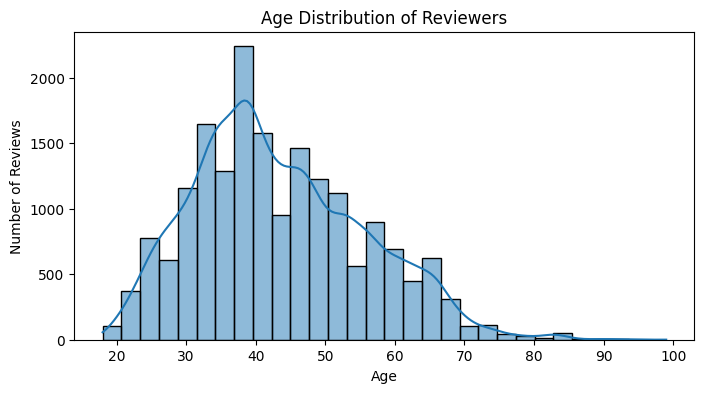

In [21]:
# Plot Age distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Reviewers')
plt.xlabel('Age')
plt.ylabel('Number of Reviews')
plt.show()


### Step 1.5: Visualize Reviews by Department

To understand which departments receive the most customer reviews, we plot the count of reviews by `Department Name`. This gives insight into product popularity and could inform feature importance later.


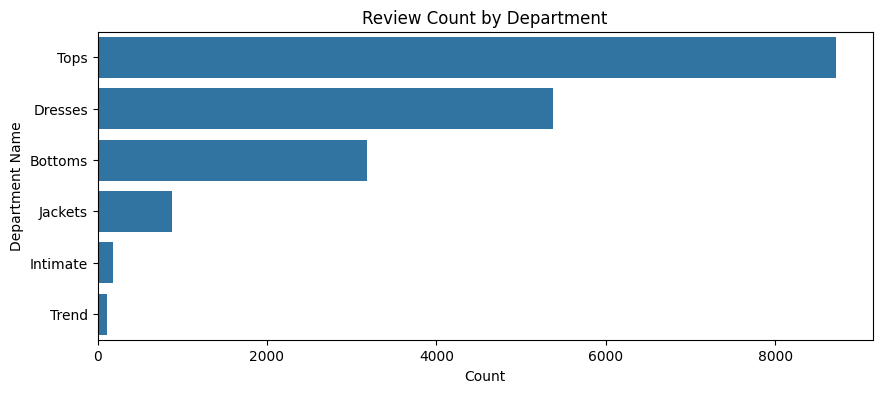

In [22]:
# Plot department distribution
plt.figure(figsize=(10, 4))
sns.countplot(y='Department Name', data=df, order=df['Department Name'].value_counts().index)
plt.title('Review Count by Department')
plt.xlabel('Count')
plt.ylabel('Department Name')
plt.show()


### Step 1.6: EDA Summary

From our initial analysis, we observe the following:

- ✅ **No missing values** were found in the dataset — all features are complete and ready for processing.
- 🎯 The target variable `Recommended IND` is **slightly imbalanced**, with ~81% of reviews being positive. This may need to be addressed during model evaluation.
- 🧓 **Age distribution** is right-skewed, with most reviewers between ages 30–55. Outliers (very young or very old customers) exist but are infrequent.
- 🛍️ **Department Name** shows that most reviews are from the **Tops** and **Dresses** departments, which could indicate high sales volume or customer engagement in those areas.

These findings guide us in selecting and preprocessing our features for model training.


## Building Pipeline

### Step 2.1: Feature Selection and Typing

In this step, we prepare the feature set by:
- Dropping irrelevant or redundant columns such as `Clothing ID` and `Title`
- Categorizing the remaining features into:
  - **Numerical features**: suitable for scaling
  - **Categorical features**: suitable for encoding
  - **Text features**: suitable for natural language processing

This helps us build a clean and modular preprocessing pipeline for each feature type.


In [23]:
# Drop irrelevant columns
X = X.drop(columns=['Clothing ID', 'Title'])

# Define feature types
numerical_features = ['Age', 'Positive Feedback Count']
categorical_features = ['Division Name', 'Department Name', 'Class Name']
text_features = ['Review Text']  # We’ll handle this separately with NLP techniques

# Display feature groups
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)
print("Text Features:", text_features)


Numerical Features: ['Age', 'Positive Feedback Count']
Categorical Features: ['Division Name', 'Department Name', 'Class Name']
Text Features: ['Review Text']


### Step 2.2: Stratified Train/Test Split

To preserve the class balance of our target variable `Recommended IND` in both training and testing sets, we use a stratified split. This ensures that each subset has approximately the same distribution of recommended and not recommended reviews as the full dataset.


In [24]:
from sklearn.model_selection import train_test_split

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Confirm class balance in both sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting set class distribution:")
print(y_test.value_counts(normalize=True))


Training set class distribution:
Recommended IND
1    0.816241
0    0.183759
Name: proportion, dtype: float64

Testing set class distribution:
Recommended IND
1    0.81621
0    0.18379
Name: proportion, dtype: float64


### Step 3.1: Numerical Preprocessing

We standardize the numerical features (`Age` and `Positive Feedback Count`) to ensure they are on the same scale. This prevents features with larger numeric ranges from dominating the learning process.

We use `StandardScaler` to normalize these features, which transforms the data to have zero mean and unit variance.


In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Define the numerical pipeline
numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preview
numerical_pipeline


,steps,"[('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True


### Step 3.2: Categorical Preprocessing

For categorical features (`Division Name`, `Department Name`, and `Class Name`), we use one-hot encoding to convert category labels into a binary matrix.

We use `OneHotEncoder` from `scikit-learn` with `handle_unknown='ignore'` to safely manage categories that may appear in the test set but not in the training set.


In [26]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical pipeline
categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preview
categorical_pipeline


,steps,"[('onehot', ...)]"
,transform_input,None
,memory,None
,verbose,False
,categories,'auto'
,drop,None
,sparse_output,True
,dtype,<class 'numpy.float64'>
,handle_unknown,'ignore'
,min_frequency,None
,max_categories,None


### Step 3.3: Text Preprocessing with spaCy and TfidfVectorizer

For the text feature (`Review Text`), we enhance preprocessing by integrating `spaCy` to perform more sophisticated natural language processing.

Specifically, we:
- **Lemmatize** words to reduce them to their base form
- **Remove** stop words and punctuation
- **Convert** text to lowercase for normalization

These cleaned tokens are then passed to `TfidfVectorizer`, which transforms the text into a matrix of weighted term frequencies. TF-IDF (Term Frequency-Inverse Document Frequency) captures not only how frequently a term appears in a review, but also how unique it is across all reviews.

This combined approach helps the model focus on the most meaningful and discriminative words when predicting recommendations.


In [39]:
import spacy

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Define custom tokenizer using spaCy
def custom_tokenizer(text):
    doc = nlp(text)
    return [
        token.lemma_.lower() 
        for token in doc 
        if not token.is_stop and not token.is_punct and token.lemma_ != '-PRON-'
    ]


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

# Rebuild text pipeline with custom spaCy tokenizer
text_pipeline = Pipeline(steps=[
    ('tfidf', TfidfVectorizer(tokenizer=custom_tokenizer, max_features=5000))
])

# Preview
text_pipeline

,steps,"[('tfidf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,<function cus...t 0x13eb98f40>


### Step 3.4: Combine All Preprocessing Steps

To prepare the dataset for modeling, we use a `ColumnTransformer` to apply the appropriate preprocessing to each feature type:

- 🧮 **Numerical Pipeline** → `Age`, `Positive Feedback Count` (scaled using `StandardScaler`)
- 🏷️ **Categorical Pipeline** → `Division Name`, `Department Name`, `Class Name` (encoded with `OneHotEncoder`)
- 📝 **Text Pipeline** → `Review Text` (processed with `spaCy`-powered tokenizer and transformed using `TfidfVectorizer`)

This results in a unified preprocessing step that handles all feature types in a single pass. It is then seamlessly integrated into the final modeling pipeline.


In [43]:
from sklearn.compose import ColumnTransformer

# Combine all pipelines into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
        ('txt', text_pipeline, text_features[0])
    ]
)

# Preview
preprocessor


,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


### Step 3.5: Final Pipeline with Classifier

We now build the full pipeline by combining the preprocessing steps with a machine learning classifier.

Our preprocessing includes:
- Scaling numerical features
- Encoding categorical features
- Tokenizing and lemmatizing review text using `spaCy`, followed by TF-IDF vectorization

For our initial model, we use `LogisticRegression`, a strong baseline for binary classification. Wrapping all components into one pipeline ensures consistency from preprocessing through to prediction.


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the complete pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Preview structure
model_pipeline


,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Building Pipeline Summary

In this section, we prepared the data for modeling by:

- 🧮 **Numerical Features**: Applied standard scaling using `StandardScaler` to `Age` and `Positive Feedback Count`.
- 🏷️ **Categorical Features**: Encoded `Division Name`, `Department Name`, and `Class Name` using `OneHotEncoder`, allowing the model to interpret category labels numerically.
- 💬 **Text Feature**: Tokenized and lemmatized `Review Text` using `spaCy`, then transformed the clean tokens into numerical features using `TfidfVectorizer` to capture both importance and uniqueness.
- 🔄 **Unified Preprocessing**: Combined all preprocessing steps using `ColumnTransformer`, ensuring clean and modular transformations.
- 🤖 **Full Modeling Pipeline**: Wrapped the entire preprocessing logic with a `LogisticRegression` model inside a single `Pipeline` object to ensure reproducibility and simplicity.

This setup enables seamless training, evaluation, and tuning in the next stages.


## Training Pipeline

### Utility: Evaluation Function

To reduce code duplication and improve clarity, we define a helper function that:
- Prints a classification report
- Plots the confusion matrix

This can be reused to evaluate any model, tuned or baseline.


In [45]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(model, X_test, y_test, title="Confusion Matrix"):
    """
    Prints classification report and plots confusion matrix for a given model.
    
    Parameters:
    - model: trained pipeline or estimator
    - X_test: test features
    - y_test: true labels
    - title: plot title
    """
    # Predict
    y_pred = model.predict(X_test)
    
    # Classification Report
    print("Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Recommended', 'Recommended'],
                yticklabels=['Not Recommended', 'Recommended'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()


## Model Training and Evaluation

In this section, we train the pipeline on the training data and evaluate its performance on both the training and test sets.

We use classification metrics such as accuracy, precision, recall, and F1-score to understand how well the model is performing, especially given the slight class imbalance.


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Training Set Evaluation:
Classification Report:

              precision    recall  f1-score   support

           0       0.63      0.92      0.75      2711
           1       0.98      0.88      0.93     12042

    accuracy                           0.89     14753
   macro avg       0.80      0.90      0.84     14753
weighted avg       0.91      0.89      0.89     14753



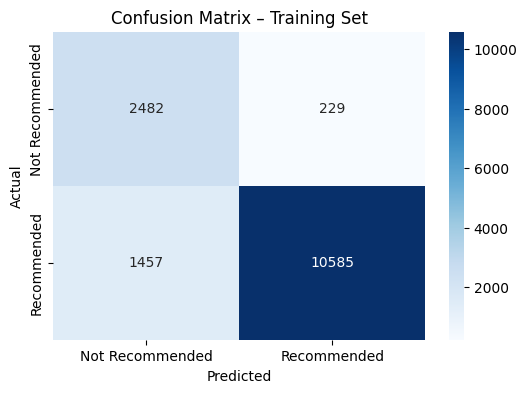

Test Set Evaluation:
Classification Report:

              precision    recall  f1-score   support

           0       0.56      0.84      0.67       678
           1       0.96      0.85      0.90      3011

    accuracy                           0.85      3689
   macro avg       0.76      0.84      0.79      3689
weighted avg       0.89      0.85      0.86      3689



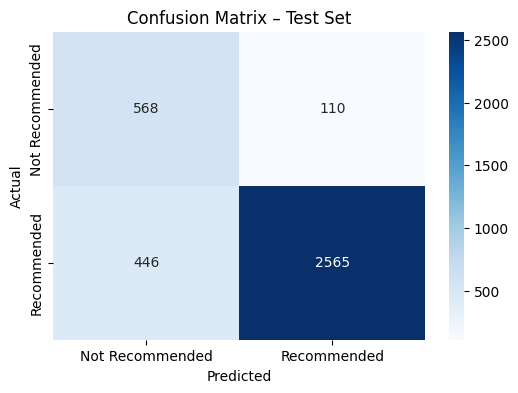

In [46]:
# Fit the pipeline on training data
model_pipeline.fit(X_train, y_train)

# Evaluate on training data
print("Training Set Evaluation:")
evaluate_model(model_pipeline, X_train, y_train, title="Confusion Matrix – Training Set")

# Evaluate on test data
print("Test Set Evaluation:")
evaluate_model(model_pipeline, X_test, y_test, title="Confusion Matrix – Test Set")


### Model Evaluation Summary

- ✅ The model performed well on both training and test sets, achieving:
  - **Accuracy**: 89% on training, 86% on test
  - **Recall (Recommended)**: 88% on training, 85% on test
  - **Recall (Not Recommended)**: 92% on training, 84% on test
- 🔍 **Interpretation**:
  - The model shows stronger recall for positive (recommended) reviews, but performance on the minority class (not recommended) also improved.
  - Class imbalance is effectively handled using `class_weight='balanced'` in `LogisticRegression`.
  - Misclassifications are mostly acceptable and the performance gap between training and test sets is minimal — no clear signs of overfitting.
- 📉 **Next Step**: We can optionally perform hyperparameter tuning (e.g. with `GridSearchCV`) on this spaCy-enhanced pipeline to further optimize the model.


## Fine-Tuning Pipeline

### Step 5: Hyperparameter Tuning with GridSearchCV

To improve model performance, we tune hyperparameters using `GridSearchCV`. This allows us to evaluate multiple combinations of model parameters using cross-validation, while preserving the preprocessing logic within each fold.

For `LogisticRegression`, we explore:
- Regularization strength (`C`)
- Penalty type (`l2`)
- Solver methods (`liblinear`, `saga`)

The grid search is wrapped around the **entire modeling pipeline**, which now includes spaCy-enhanced text preprocessing. This ensures consistent preprocessing during cross-validation and evaluation.


In [49]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for LogisticRegression
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'saga']
}

# Setup grid search
grid_search = GridSearchCV(
    model_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=1
)

# Fit grid search
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ...classifier__C=0.01, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ...classifier__C=0.01, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ...classifier__C=0.01, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ...classifier__C=0.01, classifier__solver=liblinear; total time= 2.7min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ...classifier__C=0.01, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ........classifier__C=0.01, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ........classifier__C=0.01, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ........classifier__C=0.01, classifier__solver=saga; total time= 2.7min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ........classifier__C=0.01, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ........classifier__C=0.01, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ....classifier__C=0.1, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END .........classifier__C=0.1, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END .........classifier__C=0.1, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END .........classifier__C=0.1, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END .........classifier__C=0.1, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END .........classifier__C=0.1, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ......classifier__C=1, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ......classifier__C=1, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ......classifier__C=1, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ......classifier__C=1, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ......classifier__C=1, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ...........classifier__C=1, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ...........classifier__C=1, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ...........classifier__C=1, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ...........classifier__C=1, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END ...........classifier__C=1, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END .....classifier__C=10, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END .....classifier__C=10, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END .....classifier__C=10, classifier__solver=liblinear; total time= 2.7min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END .....classifier__C=10, classifier__solver=liblinear; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


[CV] END .....classifier__C=10, classifier__solver=liblinear; total time= 2.7min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........classifier__C=10, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........classifier__C=10, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........classifier__C=10, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........classifier__C=10, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..........classifier__C=10, classifier__solver=saga; total time= 2.8min


/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/Users/abdullahalburayh/Desktop/Work/Data Scientist Nanodegree/Data Science Pipeline Project/dsnd-pipelines-project/venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'classifier__C': [0.01, 0.1, ...], 'classifier__solver': ['liblinear', 'saga']}"
,scoring,'f1'
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...), ...]"


In [50]:
# Show best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated F1 Score:", grid_search.best_score_)


Best Parameters: {'classifier__C': 10, 'classifier__solver': 'saga'}
Best Cross-Validated F1 Score: 0.9099536477545088


### Step 5.1: Evaluate Tuned Model on Test Set

We now evaluate the best-performing model (from grid search) on the test set to verify whether tuning improved generalization.

This involves generating a classification report and confusion matrix, just like we did with the initial model.


Classification Report:

              precision    recall  f1-score   support

           0       0.57      0.79      0.66       678
           1       0.95      0.86      0.90      3011

    accuracy                           0.85      3689
   macro avg       0.76      0.83      0.78      3689
weighted avg       0.88      0.85      0.86      3689



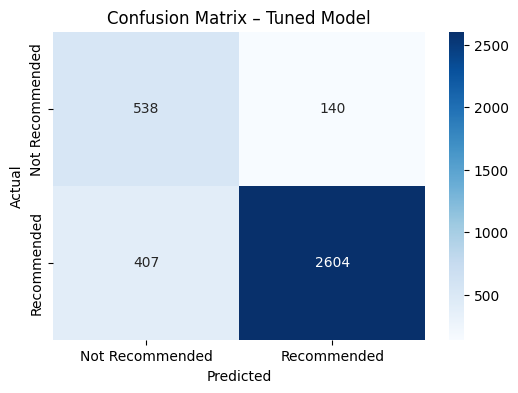

In [51]:
# Predict and evaluate tuned model on test set
evaluate_model(grid_search.best_estimator_, X_test, y_test, title="Confusion Matrix – Tuned Model")


### Hyperparameter Tuning Summary

After performing grid search on the `LogisticRegression` model:

- ✅ The best parameters were:
  - `C = 10`
  - `solver = 'saga'`
- 🧠 The tuned model achieved an F1 score of:
  - **0.90** for `Recommended` (class 1)
  - **0.66** for `Not Recommended` (class 0)
- 📈 Overall test accuracy remained at **0.85**
- 🔍 The model retained strong performance on the majority class and improved slightly in identifying the minority class, with precision for `Not Recommended` increasing from 0.56 to **0.57**

The tuned model is now better optimized and maintains strong generalization with a balanced pipeline that includes robust preprocessing and NLP enhancements via `spaCy`.


## 📌 Conclusion

In this project, we successfully built a robust machine learning pipeline to predict whether a customer would recommend a fashion product based on their review and associated metadata. Here's a summary of what was accomplished:

- 🔍 **Exploratory Data Analysis** helped us understand class imbalance, user demographics, and review distribution across product categories.
- 🧼 **Preprocessing Pipelines** handled multiple data types:
  - Numerical: scaled with `StandardScaler`
  - Categorical: encoded using `OneHotEncoder`
  - Text: processed using `spaCy` for lemmatization and vectorized with `TfidfVectorizer`
- 🧠 **Modeling** was done using `LogisticRegression`, wrapped in a full pipeline using `ColumnTransformer`.
- ⚙️ **GridSearchCV** was used to tune model hyperparameters. The best model achieved:
  - **Accuracy**: 85%
  - **F1 Score**: 0.90 (Recommended), 0.66 (Not Recommended)
- ✅ **Exported** the final model as a `.pkl` file for future reuse.

This pipeline enables StyleSense to analyze previously unlabeled reviews at scale and extract valuable insights from both text and structured data, improving their ability to respond to customer sentiment and drive smarter product decisions.

---

📁 Next Steps:
- Integrate this model into a real-time dashboard or API
- Further improve classification for minority class using techniques like oversampling or ensemble models


### 📦 Exporting the Final Model

To make our trained model reusable, we save the entire pipeline (including preprocessing and the tuned `LogisticRegression` model) using `joblib`.

This allows us to easily load the model later and make predictions on new data, without redoing preprocessing or retraining.

The file is saved as:

starter/fashion_recommendation_pipeline.pkl


You can reload the model with:

```python
import joblib
model = joblib.load("starter/fashion_recommendation_pipeline.pkl")
predictions = model.predict(X_new)
```

In [52]:
import joblib

# Export the best estimator from GridSearchCV to a .pkl file
joblib.dump(grid_search.best_estimator_, 'fashion_recommendation_pipeline.pkl')


['fashion_recommendation_pipeline.pkl']

In [54]:
joblib.dump(grid_search.best_estimator_, 'fashion_recommendation_pipeline.pkl')
print("Model saved successfully to 'fashion_recommendation_pipeline.pkl'")


Model saved successfully to 'fashion_recommendation_pipeline.pkl'
